# 2.1 Дискретизация изображения

### Выбрать значение шага дискретизации в пределах от 5 до 15. Продискретизировать с этим шагом дискретизации изображение и вывести его на экран.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

 Загрузим и сохраним изображение:

In [2]:
image=cv2.imread('imgs/Cat.jpg')

Создадим копию изображения над которой будем выполнять дискретизацию:

In [3]:
img = image.copy()

Определим шаг дискретизации:

In [4]:
K = 20

Получим размер исходного изображения:

In [5]:
s = img.shape

Запомним отдельно высоту и ширину исходника:

In [6]:
h1, w1 = s[0], s[1]

Делим высоту на шаг(k) с выделением остатка и вычитаем это из начальной высоты:

In [7]:
h = (s[0] - s[0]%K)

Проделаем то же самое для ширины:

In [8]:
w = (s[1] - s[1]%K)

Меняем размер изображения на новые высоту и ширину

In [9]:
img = cv2.resize(img,(w,h))

Пробегаем всё изображение по высоте и ширине, вычисляем средневзвешенное значение оси (в данном случае средний цвет изображения). Если же строка возвращает меньше 3, то изображение полутоновое, находим среднее значение цвета и красим изображение

In [10]:
for y in range(0, h-1, K):
    for x in range(0, w-1, K):
        if len(s)>2:
            s = np.average(img[y:(y+K), x:(x+K)], axis=0)
            img[y:(y+K), x:(x+K)] = np.average(s, axis=0)
        else:
            s = img[y:(y+K), x:(x+K)]
            img[y:(y+K), x:(x+K)] = np.average(s)


Возвращаем размер изображения к размеру исходного изображения

In [11]:
img = cv2.resize(img,(w1,h1))

Объединим исходное и дискретизированное изображение в одно окно для сравнения

In [12]:
res = np.hstack((image,img))

Выведем изображения

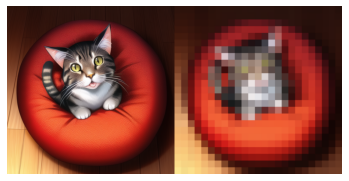

In [13]:
plt.imshow(res[...,::-1])
plt.axis("off");